
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Load data in dataframe
train = pd.read_csv('../2_01-lab-pandas-titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Find the average age of those who survived and those who did not
train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [4]:
# Find column with the most missing value
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

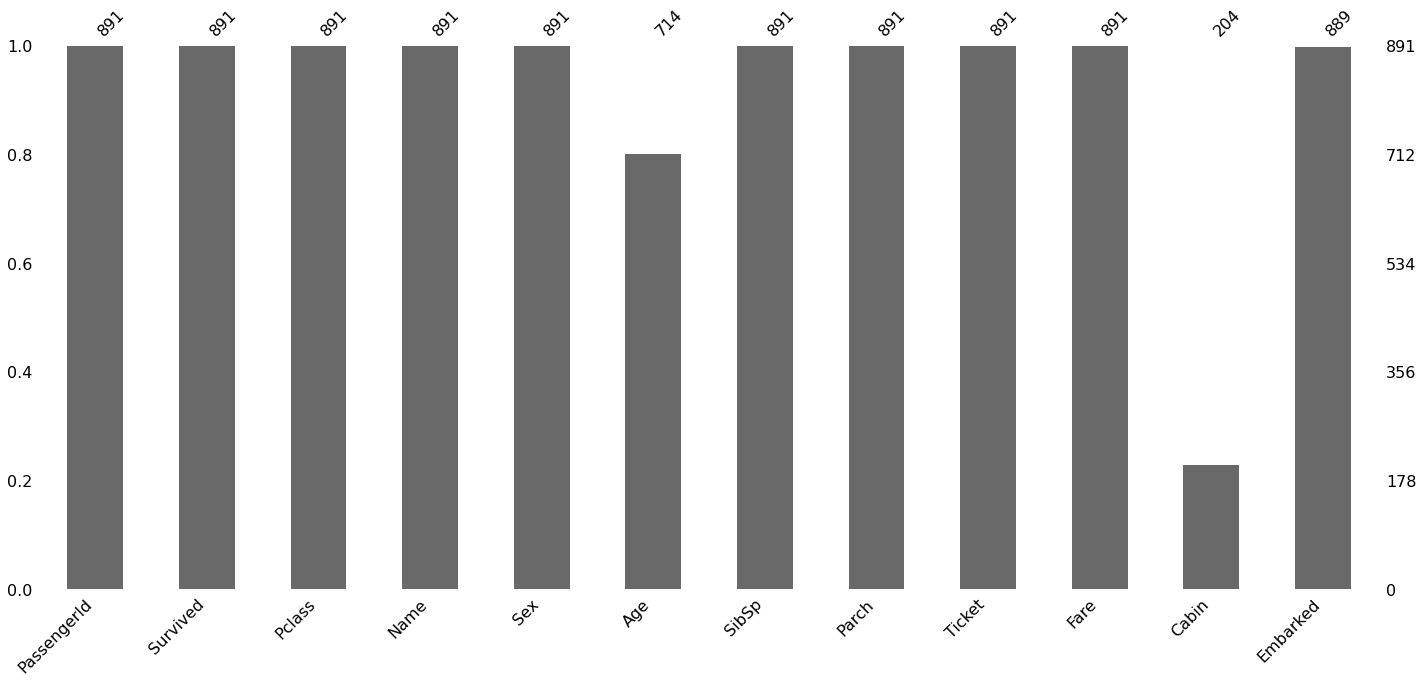

In [5]:
# Visualizing column with the most missing value
import missingno as msno
%matplotlib inline
msno.bar(train)

In [6]:
# Delete all rows where Embarked is empty
train = train.dropna(axis=0, subset=['Embarked'])

# check that rows where Embarked is empty are dropped
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# Fill all empty cabins with ¯\(ツ)/¯
train['Cabin'] = train['Cabin'].fillna('¯\(ツ)/¯')

# check
train['Cabin'].head()

0    ¯\(ツ)/¯
1        C85
2    ¯\(ツ)/¯
3       C123
4    ¯\(ツ)/¯
Name: Cabin, dtype: object

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [8]:
# Create a new column called FamilyCount which is sum of SibSp and Parch
train['FamilyCount'] = train['SibSp'] + train['Parch']

In [35]:
# Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
def is_reverend(value):
    strings = value.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0
train['IsReverend'] = train['Name'].apply(is_reverend)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Titles,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,1,Mr.,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,1,0,Mrs.,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1,1,0,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,1,0,Mrs.,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,1,Mr.,0


In [9]:
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S.
# These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
train = pd.get_dummies(train, columns=['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1


In [10]:
# Create columns to have 1's and 0's that correspond to the gender values in the Sex column
train = pd.get_dummies(train, columns=['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,1


In [11]:
# Extract the title from everyone's name and create dummy columns
train['Titles'] = train['Name'].str.extract(r', (\w+\.)')
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Titles
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,0,1,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1,1,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,1,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,1,Mr.


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [12]:
# What was the survival rate overall?
sur_rate = train['Survived'].sum()/len(train.index)
print(f"The overall survival rate is {sur_rate}")

The overall survival rate is 0.38245219347581555


In [13]:
# Female survival rate
survived = train[train['Survived'] == 1]
f_sur_rate = survived['Sex_female'].sum()/len(train.index)
f_sur_rate

0.25984251968503935

In [14]:
# Male survival rate
survived = train[train['Survived'] == 1]
m_sur_rate = survived['Sex_male'].sum()/len(train.index)
m_sur_rate

0.12260967379077616

**Which gender fared the worst?**
Male

In [15]:
# What was the survival rate for each Pclass?
train.groupby('Pclass')['Survived'].sum()/len(train.index)

Pclass
1    0.150731
2    0.097863
3    0.133858
Name: Survived, dtype: float64

In [40]:
# Did any reverends survive? How many?
train.groupby('IsReverend')['Survived'].sum()/len(train.index)

IsReverend
0    0.382452
1    0.000000
Name: Survived, dtype: float64

In [17]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
cabin_sur = train.groupby('Cabin')['Survived'].sum()/len(train.index)
cabin_sur.filter(items=['¯\(ツ)/¯'])

Cabin
¯\(ツ)/¯    0.231721
Name: Survived, dtype: float64

In [18]:
# What is the survival rate for people whose Age is empty?
train.groupby(train['Age'].isnull())['Survived'].sum()/len(train.index)

Age
False    0.323960
True     0.058493
Name: Survived, dtype: float64

In [19]:
# What is the survival rate for each port of embarkation?
survived['Embarked_C'].sum()/len(train.index)

0.1046119235095613

In [20]:
#Your code here 
survived['Embarked_Q'].sum()/len(train.index)

0.03374578177727784

In [21]:
#Your code here 
survived['Embarked_S'].sum()/len(train.index)

0.2440944881889764

In [22]:
# What is the survival rate for children (under 12) in each Pclass?
under_12_sur = train[(train['Age'] < 12) & (train['Survived'] == 1)]
under_12_sur.groupby('Pclass').sum()/len(train.index)

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Pclass,,,,,,,,,,,,
1,1.749156,0.003375,0.017908,0.002250,0.006749,0.397535,0.008999,0.000000,0.0,0.003375,0.000000,0.003375
2,8.628796,0.019123,0.066738,0.015748,0.025872,0.549588,0.041620,0.002250,0.0,0.016873,0.008999,0.010124
3,10.102362,0.021372,0.076400,0.022497,0.026997,0.370477,0.049494,0.006749,0.0,0.014623,0.012373,0.008999


In [23]:
# Did the captain of the ship survive? Is he on the list?

In [24]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
train.sort_values(by=['Fare', 'Survived'], ascending=False).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Titles
258,259,1,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,¯\(ツ)/¯,0,1,0,0,1,0,Miss.


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


[[Text(0, 0, 'Female'), Text(1, 0, 'Male')]]

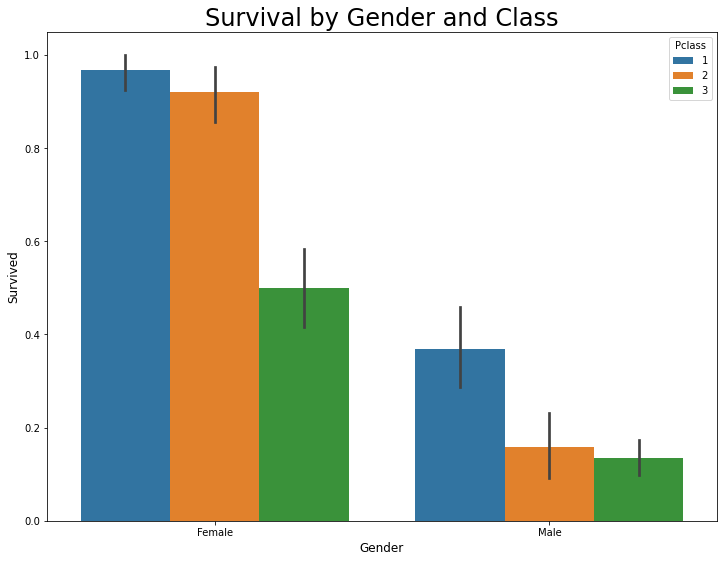

In [57]:
# Gender and Pclass
plt.figure(figsize = ( 12 , 9 ))
g= sns.barplot(data=train, x='Sex_male', y='Survived', hue='Pclass')
plt.xlabel( "Gender" , size = 12 )
plt.ylabel( "Survived" , size = 12 )
plt.title( "Survival by Gender and Class" , size = 24 )
g.set(xticklabels=["Female", "Male"])

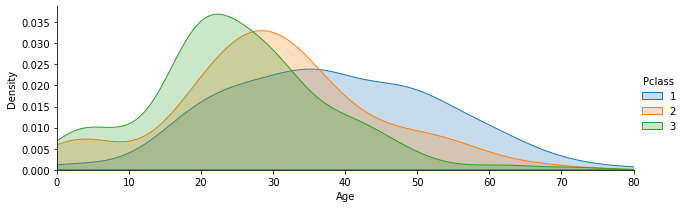

In [58]:
# graph looking at the distribution of age across each Pclass
age_class = sns.FacetGrid(train, hue='Pclass', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "Age", shade=True).add_legend()
age_class.set(xlim=(0, 80))

<AxesSubplot:>

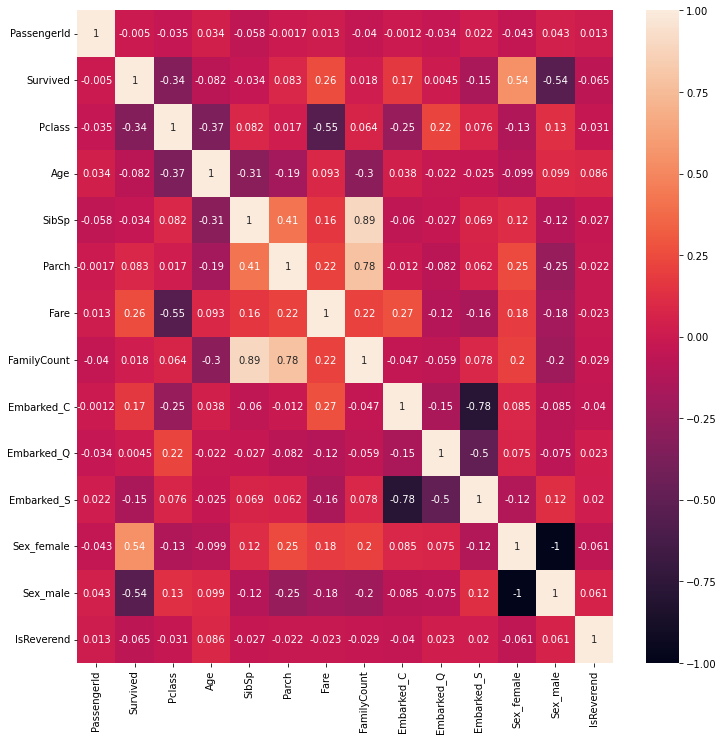

In [61]:
# Heatmap of correlation 
plt.figure(figsize = ( 12 , 12 ))
sns.heatmap(train.corr(), annot = True)